In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')




In [2]:
# Load the data
df = pd.read_csv("HDHI Admission data.csv")
pd.set_option('display.max_columns', None)


In [3]:
# Replace 'EMPTY' strings with NaN
df.replace('EMPTY', pd.NA, inplace=True)
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Impute missing values
# For numerical columns, use the mean
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
numerical_cols

Index(['SNO', 'AGE', 'DURATION OF STAY', 'duration of intensive unit stay',
       'SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD',
       'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
       'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF',
       'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED',
       'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE',
       'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK',
       'SHOCK', 'PULMONARY EMBOLISM'],
      dtype='object')

In [5]:
# Convert 'D.O.A' to datetime
df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')
df['D.O.A']

0       2017-04-01
1       2017-04-01
2       2017-04-01
3       2017-04-01
4       2017-04-01
           ...    
15752          NaT
15753   2019-03-31
15754          NaT
15755          NaT
15756          NaT
Name: D.O.A, Length: 15757, dtype: datetime64[ns]

In [6]:
# Sort by 'MRD No.' and 'D.O.A' to ensure the latest entry is first
df.sort_values(by=['MRD No.', 'D.O.A'], ascending=[True, False], inplace=True)
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
6499,6500,1006,2018-02-09,4/7/2018,80,M,U,E,Feb-18,58,58,EXPIRY,0,0,0,0,1,0,0,8.4,35.9,27,NaN,108,0.9,78,1,40,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9466,9467,101169,2018-09-07,18/07/2018,64,F,U,O,Jul-18,10,2,DISCHARGE,0,0,0,1,1,0,0,11.8,9.8,234,92,16,0.6,NaN,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6656,6657,101189,NaT,15/02/2018,70,M,U,O,Feb-18,1,0,DISCHARGE,0,0,0,0,0,0,0,14.1,5.5,136,183,35,0.8,NaN,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5834,5835,101322,2018-07-01,08/01/2018,74,F,U,E,Jan-18,2,1,DISCHARGE,0,0,0,1,1,0,0,13,8.8,386,142,17,0.5,40,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8169,8170,101322,2018-04-05,06/05/2018,74,F,U,E,May-18,3,0,DISCHARGE,0,0,0,1,1,0,0,12,8.2,366,98,27,0.6,NaN,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1197,99555,2017-06-05,6/7/2017,59,F,U,E,Jun-17,3,3,DAMA,0,0,1,0,0,1,0,12.1,14.9,136,NaN,64,2.4,1360,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
8558,8559,99685,NaT,26/05/2018,63,M,U,E,May-18,2,2,DAMA,0,0,1,1,1,0,0,13,11.8,152,386,55,2.13,193,0,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14308,14309,99949,2019-04-02,05/02/2019,48,F,U,O,Feb-19,2,0,DISCHARGE,0,0,0,1,1,0,0,13.3,6.7,263,87,20,0.76,5,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8592,8593,99949,NaT,29/05/2018,47,F,U,E,May-18,3,1,DISCHARGE,0,0,0,1,1,0,0,13.6,10.1,230,103,18,0.64,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Add 'Readmission Count' column
df['Readmission Count'] = df.groupby('MRD No.')['MRD No.'].transform('count')


In [8]:
# Add 'Readmission' column 
df['Readmission'] = df['Readmission Count'].apply(lambda x: 1 if x > 1 else 0)


In [9]:
# Drop duplicates keeping the oldest entry based on 'D.O.A'
df_latest = df.drop_duplicates(subset=['MRD No.'], keep='last')
df_latest


,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,Readmission Count,Readmission
6499,6500,1006,2018-02-09,4/7/2018,80,M,U,E,Feb-18,58,58,EXPIRY,0,0,0,0,1,0,0,8.4,35.9,27,NaN,108,0.9,78,1,40,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
9466,9467,101169,2018-09-07,18/07/2018,64,F,U,O,Jul-18,10,2,DISCHARGE,0,0,0,1,1,0,0,11.8,9.8,234,92,16,0.6,NaN,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6656,6657,101189,NaT,15/02/2018,70,M,U,O,Feb-18,1,0,DISCHARGE,0,0,0,0,0,0,0,14.1,5.5,136,183,35,0.8,NaN,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1822,1823,101322,2017-07-07,08/04/2017,74,F,U,E,Jul-17,2,1,DISCHARGE,0,0,0,1,1,0,0,13,8.8,386,142,17,0.5,40,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
11500,11501,101766,NaT,23/10/2018,58,M,U,E,Oct-18,8,4,DISCHARGE,0,0,0,1,1,0,0,7.3,4.9,283,105,94,2,740,1,32,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,3648,99499,2017-10-11,10/14/2017,55,M,U,E,Oct-17,4,0,DISCHARGE,0,0,0,0,0,0,0,15,3.5,60,121,40,1.2,NaN,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1196,1197,99555,2017-06-05,6/7/2017,59,F,U,E,Jun-17,3,3,DAMA,0,0,1,0,0,1,0,12.1,14.9,136,NaN,64,2.4,1360,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0
8558,8559,99685,NaT,26/05/2018,63,M,U,E,May-18,2,2,DAMA,0,0,1,1,1,0,0,13,11.8,152,386,55,2.13,193,0,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8592,8593,99949,NaT,29/05/2018,47,F,U,E,May-18,3,1,DISCHARGE,0,0,0,1,1,0,0,13.6,10.1,230,103,18,0.64,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1


In [10]:
duplicate_counts = df['MRD No.'].value_counts()
duplicate_counts

MRD No.
256628    17
273016    15
325715    11
177926    11
351289     9
          ..
367321     1
367347     1
367366     1
367367     1
NILL       1
Name: count, Length: 12244, dtype: int64

In [11]:

# Count duplicates
duplicate_counts = df['MRD No.'].value_counts()
duplicate_mrd_no = duplicate_counts[duplicate_counts > 1].index
duplicate_rows = df[df['MRD No.'].isin(duplicate_mrd_no)]

print("Rows with duplicate MRD No.:")
print(duplicate_rows)


Rows with duplicate MRD No.:
         SNO MRD No.      D.O.A       D.O.D  AGE GENDER RURAL  \
5834    5835  101322 2018-07-01  08/01/2018   74      F     U   
8169    8170  101322 2018-04-05  06/05/2018   74      F     U   
6416    6417  101322 2018-02-04    2/6/2018   74      F     U   
5194    5195  101322 2017-12-16  12/17/2017   74      F     U   
1822    1823  101322 2017-07-07  08/04/2017   74      F     U   
...      ...     ...        ...         ...  ...    ...   ...   
12719  12720     989 2018-05-12  07/12/2018   71      M     U   
12720  12721     989 2018-05-12  07/12/2018   71      M     U   
11476  11477     989        NaT  17/10/2018   71      M     U   
14308  14309   99949 2019-04-02  05/02/2019   48      F     U   
8592    8593   99949        NaT  29/05/2018   47      F     U   

      TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  \
5834                                E     Jan-18                 2   
8169                                E     May-18  

In [12]:
# Drop columns that are not needed for the model
to_drop = ['SNO', 'D.O.D', 'month year']
df_latest.drop(columns=to_drop, inplace=True)


In [13]:

# Encode categorical variables
label_encoders = {
    'GENDER': LabelEncoder(),
    'RURAL': LabelEncoder(),
    'TYPE OF ADMISSION-EMERGENCY/OPD': LabelEncoder(),
    'OUTCOME': LabelEncoder()
}

for col, le in label_encoders.items():
    if col in df_latest.columns:
        df_latest[col] = le.fit_transform(df_latest[col])

# Create the input_df (features) and target (label)
input_df = df_latest.drop(columns=['OUTCOME', 'D.O.A', 'MRD No.', 'Readmission', 'Readmission Count','INFECTIVE ENDOCARDITIS','CVA BLEED','SSS', 'NEURO CARDIOGENIC SYNCOPE', 'DVT','ORTHOSTATIC','PSVT','SEVERE ANAEMIA','CONGENITAL','PULMONARY EMBOLISM'])
target = df_latest['Readmission']

input_df

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,AKI,CVA INFRACT,AF,VT,UTI,CARDIOGENIC SHOCK,SHOCK,CHEST INFECTION
6499,80,1,1,0,58,58,0,0,0,0,1,0,0,8.4,35.9,27,NaN,108,0.9,78,1,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
9466,64,0,1,1,10,2,0,0,0,1,1,0,0,11.8,9.8,234,92,16,0.6,NaN,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6656,70,1,1,1,1,0,0,0,0,0,0,0,0,14.1,5.5,136,183,35,0.8,NaN,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1822,74,0,1,0,2,1,0,0,0,1,1,0,0,13,8.8,386,142,17,0.5,40,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11500,58,1,1,0,8,4,0,0,0,1,1,0,0,7.3,4.9,283,105,94,2,740,1,32,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,55,1,1,0,4,0,0,0,0,0,0,0,0,15,3.5,60,121,40,1.2,NaN,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,59,0,1,0,3,3,0,0,1,0,0,1,0,12.1,14.9,136,NaN,64,2.4,1360,0,24,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0
8558,63,1,1,0,2,2,0,0,1,1,1,0,0,13,11.8,152,386,55,2.13,193,0,45,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8592,47,0,1,0,3,1,0,0,0,1,1,0,0,13.6,10.1,230,103,18,0.64,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:

# Ensure all values are numeric
input_df = input_df.apply(pd.to_numeric, errors='coerce')



In [15]:

# Handle remaining NaN values if any
input_df.fillna(0, inplace=True)  # Or use another appropriate method
new_input_df =input_df[['GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'RURAL', 'PLATELETS', 'GLUCOSE', 'TLC', 'UREA', 'HB', 'AGE', 'CREATININE', 'DURATION OF STAY', 'EF', 'BNP', 'duration of intensive unit stay']]


In [16]:

print(f"Full dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Full dataset size: {df_latest.shape[0]} rows, {df_latest.shape[1]} columns")
print(f"Input features size: {new_input_df.shape[0]} rows, {new_input_df.shape[1]} columns")
print(new_input_df)

Full dataset size: 15757 rows, 58 columns
Full dataset size: 12244 rows, 55 columns
Input features size: 12244 rows, 14 columns
       GENDER  TYPE OF ADMISSION-EMERGENCY/OPD  RURAL  PLATELETS  GLUCOSE  \
6499        1                                0      1       27.0      0.0   
9466        0                                1      1      234.0     92.0   
6656        1                                1      1      136.0    183.0   
1822        0                                0      1      386.0    142.0   
11500       1                                0      1      283.0    105.0   
...       ...                              ...    ...        ...      ...   
3647        1                                0      1       60.0    121.0   
1196        0                                0      1      136.0      0.0   
8558        1                                0      1      152.0    386.0   
8592        0                                0      1      230.0    103.0   
10164       1            

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_input_df, target, test_size=0.2, random_state=42, stratify=target)

# Print sizes after splitting
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 9795 rows
Testing set size: 2449 rows


In [18]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Define models and parameter grids with pipelines
models_and_parameters = {
    "Decision Tree": (Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', tree.DecisionTreeClassifier())
    ]), {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    
    # "Logistic Regression": (Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('classifier', LogisticRegression())
    # ]), {
    #     'classifier__C': [0.01, 0.1, 1, 10],
    #     'classifier__penalty': ['l2'],
    #     'classifier__solver': ['lbfgs', 'saga']
    # }),

    "Random Forest": (Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    
    "KNN": (Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]), {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    })
}

# Iterate through models and perform GridSearchCV
for name, (pipeline, params) in models_and_parameters.items():
    grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    accuracy = best_model.score(X_test, y_test)
    predictions = best_model.predict(X_test)
    
    print(f"\n{name} Best Model Parameters: {grid_search.best_params_}")
    print(f"{name} Best Model Accuracy: {accuracy}")
    print(f"{name} Predictions vs Actual:")
    print(pd.DataFrame({"Predicted": predictions, "Actual": y_test}))

    # Confusion Matrix and Classification Report
    print(f"\n{name} Model Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print(f"{name} Model Classification Report:")
    print(classification_report(y_test, predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Decision Tree Best Model Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Decision Tree Best Model Accuracy: 0.7631686402613311
Decision Tree Predictions vs Actual:
       Predicted  Actual
946            0       0
2008           0       0
3162           0       1
3761           0       1
8344           0       0
...          ...     ...
3721           0       0
11963          0       0
8581           0       0
5769           0       0
408            0       0

[2449 rows x 2 columns]

Decision Tree Model Confusion Matrix:
[[1842   87]
 [ 493   27]]
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1929
           1       0.24      0.05      0.09       520

    accuracy                           0.76      2449
   macro avg       0.51      0.50      0.47      2449
weighted avg       0.67      0.76    

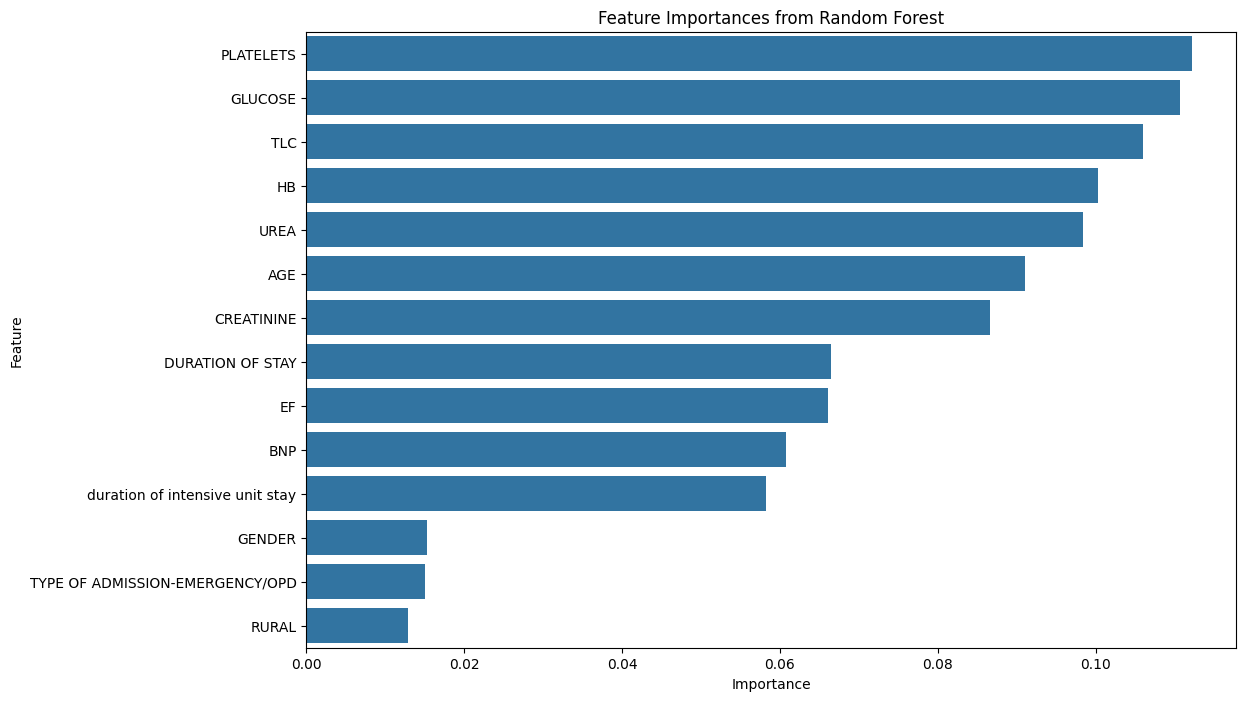

In [20]:

# Train a Random Forest model to get feature importances
rf_model = RandomForestClassifier()
rf_model.fit(new_input_df, target)

# Get feature importances
importances = rf_model.feature_importances_
features = new_input_df.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [21]:
'PLATELETS','GLUCOSE','TLC','UREA','HB','AGE','CREATININE','DURATION OF STAY', 'EF','BNP','duration of intensive unit stay',

('PLATELETS',
 'GLUCOSE',
 'TLC',
 'UREA',
 'HB',
 'AGE',
 'CREATININE',
 'DURATION OF STAY',
 'EF',
 'BNP',
 'duration of intensive unit stay')